The dataset used for this study included both pollutant data and weather variables collected from a global weather repository.

Information on AQI: https://document.airnow.gov/technical-assistance-document-for-the-reporting-of-daily-air-quailty.pdf

### 1st Research Question: "Which Weather Factors Play a Huge Role in Determining AQI Levels?"



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression: MSE=0.4337, R2=0.4470
Random Forest: MSE=0.2989, R2=0.6189
Gradient Boosting: MSE=0.3481, R2=0.5561
Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}
Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best Random Forest: MSE=0.2994, R2=0.6080
Best Gradient Boosting: MSE=0.3258, R2=0.5735


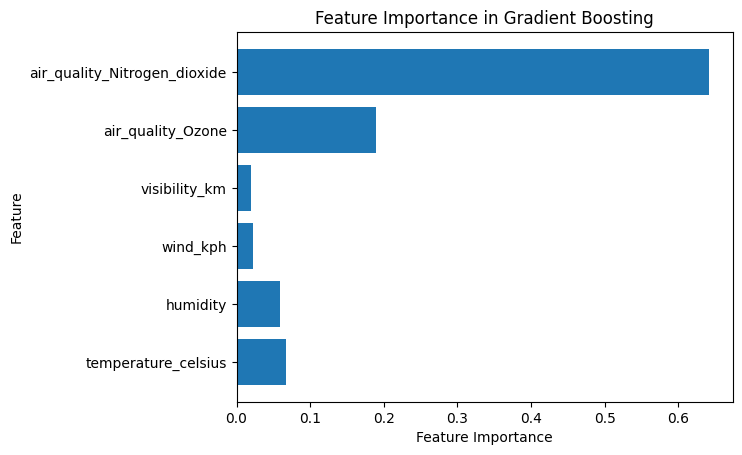

In [ ]:


# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

# Select relevant features
features = ['temperature_celsius', 'humidity', 'wind_kph', 'visibility_km',
            'air_quality_Ozone', 'air_quality_Nitrogen_dioxide']
target = 'air_quality_us-epa-index'

# Filter data for selected features and target
df = df[features + [target]].dropna()

# Split features and target variable
X = df[features]
y = df[target]

# Split into training, validation, and test sets
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_valid = model.predict(X_valid_scaled)
    mse = mean_squared_error(y_valid, y_pred_valid)
    r2 = r2_score(y_valid, y_pred_valid)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE={mse:.4f}, R2={r2:.4f}")

# Hyperparameter tuning for Random Forest and Gradient Boosting
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_squared_error')

grid_rf.fit(X_train_scaled, y_train)
grid_gb.fit(X_train_scaled, y_train)

print(f"Best Random Forest Parameters: {grid_rf.best_params_}")
print(f"Best Gradient Boosting Parameters: {grid_gb.best_params_}")

# Evaluate best models
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

for name, model in [("Best Random Forest", best_rf), ("Best Gradient Boosting", best_gb)]:
    y_pred_test = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    print(f"{name}: MSE={mse:.4f}, R2={r2:.4f}")

# Feature importance for Gradient Boosting
feature_importance = best_gb.feature_importances_
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Gradient Boosting")
plt.show()


**Methods**

**1 Data Preprocessing:**
- Extract a subset of relevant features: temperature, humidity, wind speed, visibility, air quality Ozone, and air quality Nitrogen Dioxide.
- Missing values were dropped to ensure data consistency.
- Standard scaling was applied to normalize feature values and improve model convergence.

**2 Models and Evaluation Metrics:**
Three regression models were used:
- **Linear Regression**: A simple baseline model to establish relationships.
- **Random Forest**: A non-parametric ensemble method suitable for capturing non-linear relationships.
- **Gradient Boosting**: A boosting method optimizing prediction errors iteratively.

where models were evaluated based on **Mean Squared Error (MSE)** (average squared difference between actual and predicted AQI) and **R-squared (R²)** ( proportion of variance explained by the model).

**3 Hyperparameter Optimization:**
- **Random Forest**: number of estimators (`n_estimators`) and tree depth (`max_depth`) were tuned.
- **Gradient Boosting**: number of estimators (`n_estimators`) and learning rate (`learning_rate`) were optimized.
- Grid search was applied with cross-validation for robust selection of hyperparameters.

---

#### **Results**

**1 Baseline Model Performance:**
- **Linear Regression**: MSE=0.4337, R²=0.4470
- **Random Forest**: MSE=0.2989, R²=0.6189
- **Gradient Boosting**: MSE=0.3481, R²=0.5561

**2 Optimized Model Performance:**
- **Best Random Forest**: Hyperparameters: `{'max_depth': None, 'n_estimators': 200}`
  - MSE=0.2994, R²=0.6080
- **Best Gradient Boosting**: Hyperparameters: `{'learning_rate': 0.2, 'n_estimators': 200}`
  - MSE=0.3258, R²=0.5735

**3 Feature Importance (Gradient Boosting):**
The Gradient Boosting model provided insights into the importance of each feature (Figure 1):
- **Nitrogen Dioxide** had the highest importance (0.65), indicating a dominant influence on AQI.
- **Ozone** followed with a moderate contribution (0.25).
- **Visibility**, **wind speed**, **humidity**, and **temperature** showed relatively minor effects.

---

#### **Discussion**

**1 Insights into Weather Factors:**
- **Nitrogen Dioxide (NO₂)**: As a primary pollutant, NO₂ strongly correlates with AQI due to its impact on respiratory health and its role in forming secondary pollutants like ozone.
- **Ozone (O₃)**: Ozone's significance aligns with its direct impact on air quality, particularly in urban regions.
- **Other Weather Variables**: Although visibility, wind speed, humidity, and temperature contributed less to the model, they likely serve as modifiers rather than primary drivers of AQI.

**2 Model Comparison:**
- **Linear Regression** underperformed due to its inability to model complex, non-linear relationships.
- **Random Forest** excelled in capturing non-linearities and interactions, achieving the best validation R² (0.6189).
- **Gradient Boosting** offered competitive performance while providing robust feature importance rankings. However, its validation R² was slightly lower (0.5561).



## 2nd Research Question: How do we classify AQI levels based on weather and pollutant data?


Logistic Regression Validation Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      2294
           1       0.72      0.81      0.76        16
           2       0.54      0.35      0.43       841
           3       0.52      0.40      0.45       124
           4       0.36      0.07      0.11       196
           5       0.00      0.00      0.00        20

    accuracy                           0.74      3491
   macro avg       0.49      0.43      0.44      3491
weighted avg       0.69      0.74      0.70      3491



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



k-NN Validation Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2294
           1       0.86      0.75      0.80        16
           2       0.62      0.52      0.57       841
           3       0.56      0.48      0.52       124
           4       0.46      0.26      0.33       196
           5       0.50      0.30      0.38        20

    accuracy                           0.77      3491
   macro avg       0.64      0.54      0.58      3491
weighted avg       0.75      0.77      0.76      3491


SVM Validation Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2294
           1       0.76      0.81      0.79        16
           2       0.49      0.29      0.37       841
           3       0.51      0.35      0.42       124
           4       0.00      0.00      0.00       196
           5       0.00      0.00      0.00        20

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Validation Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2294
           1       0.88      0.88      0.88        16
           2       0.70      0.65      0.68       841
           3       0.64      0.60      0.62       124
           4       0.58      0.31      0.41       196
           5       0.75      0.30      0.43        20

    accuracy                           0.82      3491
   macro avg       0.74      0.61      0.65      3491
weighted avg       0.81      0.82      0.81      3491


Test Set Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2294
           1       0.83      0.94      0.88        16
           2       0.70      0.66      0.68       842
           3       0.65      0.56      0.60       125
           4       0.61      0.35      0.44       196
           5       0.75      0.32      0.44        19

    accur

<ipython-input-17-9c335db5780a>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


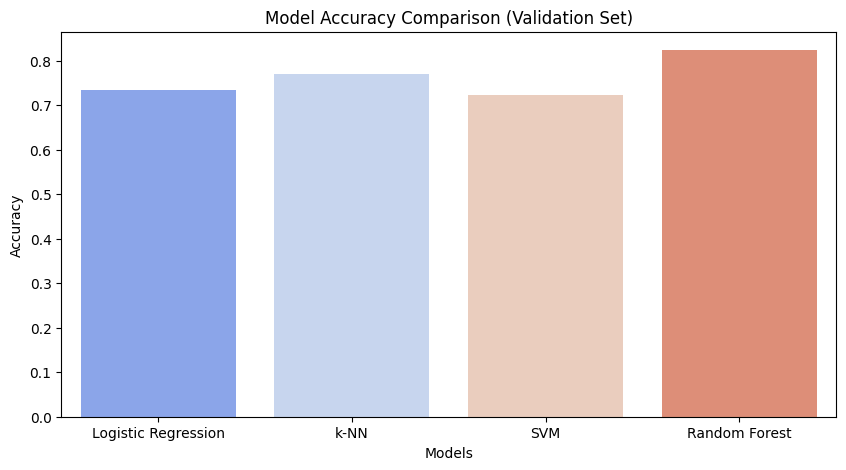

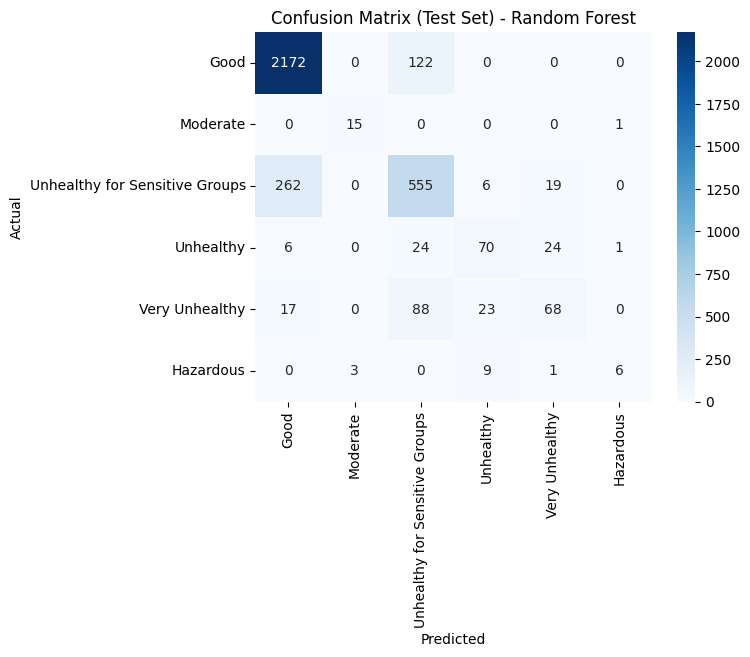


Final Test Set Report (Random Forest):
                                precision    recall  f1-score   support

                          Good       0.88      0.95      0.91      2294
                      Moderate       0.83      0.94      0.88        16
Unhealthy for Sensitive Groups       0.70      0.66      0.68       842
                     Unhealthy       0.65      0.56      0.60       125
                Very Unhealthy       0.61      0.35      0.44       196
                     Hazardous       0.75      0.32      0.44        19

                      accuracy                           0.83      3492
                     macro avg       0.74      0.63      0.66      3492
                  weighted avg       0.82      0.83      0.82      3492



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

# Key weather features for AQI prediction
key_features = [
    'cloud', 'uv_index', 'humidity', 'temperature_celsius', 'air_quality_Nitrogen_dioxide', 'air_quality_Carbon_Monoxide',
    'air_quality_Sulphur_dioxide', 'air_quality_Ozone'
    ]

# Filter relevant features
df_filtered = df[key_features].copy()

# Map 'air_quality_us-epa-index' to AQI categories
aqi_mapping = {
    1: 'Good',
    2: 'Moderate',
    3: 'Unhealthy for Sensitive Groups',
    4: 'Unhealthy',
    5: 'Very Unhealthy',
    6: 'Hazardous'
}
df_filtered['aqi_category'] = df['air_quality_us-epa-index'].map(aqi_mapping)

# Handle missing values
df_filtered.replace(-9999, np.nan, inplace=True)
imputer = SimpleImputer(strategy='median')
df_filtered[key_features] = imputer.fit_transform(df_filtered[key_features])

# Encode target variable
df_filtered['aqi_category_encoded'] = df_filtered['aqi_category'].astype('category').cat.codes

# Split data into features (X) and target (y)
X = df_filtered[key_features]
y = df_filtered['aqi_category_encoded']

# Train-test-validation split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42, stratify=y_tmp)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Classification Models
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_valid_log_reg = log_reg.predict(X_valid)
print("\nLogistic Regression Validation Report:")
print(classification_report(y_valid, y_pred_valid_log_reg))

# 2. k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_valid_knn = knn.predict(X_valid)
print("\nk-NN Validation Report:")
print(classification_report(y_valid, y_pred_valid_knn))

# 3. SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_valid_svm = svm.predict(X_valid)
print("\nSVM Validation Report:")
print(classification_report(y_valid, y_pred_valid_svm))

# 4. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_valid_rf = rf.predict(X_valid)
print("\nRandom Forest Validation Report:")
print(classification_report(y_valid, y_pred_valid_rf))

# Final Evaluation on Test Set (Best Model)
best_model = rf  # Replace with your choice of the best model based on validation results
y_pred_test = best_model.predict(X_test)
print("\nTest Set Report (Random Forest):")
print(classification_report(y_test, y_pred_test))

# Compare model performance
models = ['Logistic Regression', 'k-NN', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_valid, y_pred_valid_log_reg),
    accuracy_score(y_valid, y_pred_valid_knn),
    accuracy_score(y_valid, y_pred_valid_svm),
    accuracy_score(y_valid, y_pred_valid_rf),
]

# Plot model accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.title("Model Accuracy Comparison (Validation Set)")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# Display confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=aqi_mapping.values(), yticklabels=aqi_mapping.values())
plt.title("Confusion Matrix (Test Set) - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Final Classification Report
target_names = list(aqi_mapping.values())
print("\nFinal Test Set Report (Random Forest):")
print(classification_report(y_test, y_pred_test, target_names=target_names))




**Methods**

**1.1 Data Preprocessing**

**Feature Selection**
To focus on the most relevant variables for AQI prediction, features were selected based on their scientific and statistical significance.

- **Pollutants**: Ozone (O₃), PM2.5, PM10, Carbon Monoxide (CO), Nitrogen Dioxide (NO₂), and Sulfur Dioxide (SO₂). These pollutants were chosen because they are regulated under the Clean Air Act and directly impact AQI calculations.
- **Weather Variables**: Visibility, humidity, and temperature. These variables are known to influence pollutant dispersion and chemical reactions in the atmosphere.

This selection ensured the dataset captured both direct and indirect factors affecting air quality.

**Handling Missing Data**
Missing values, which are common in real-world datasets, were imputed using median values. This approach was chosen because the median is robust to outliers and preserves the dataset's central tendency. Imputing missing data ensured no loss of valuable observations, thereby maintaining the dataset's size and statistical power.

**Scaling**
Standard scaling was applied to all numerical features to normalize their distributions. This step was necessary because machine learning models like SVM and k-NN are sensitive to the scale of input features. For instance, without scaling, variables with larger ranges (e.g., PM2.5) could disproportionately influence the model compared to variables with smaller ranges (e.g., O₃ concentrations).

**Encoding Target Variable**
The AQI levels, originally numeric, were categorized into six distinct bins based on EPA standards: Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy, Very Unhealthy, and Hazardous. This transformation converted the regression problem into a classification problem, aligning with the study's objective.

**1.2 Models and Evaluation Metrics**

Four classification models were chosen for their diverse capabilities in handling complex datasets and their applicability to environmental data:

- **Logistic Regression**: This baseline model assumes a linear relationship between features and output categories. It served as a benchmark to evaluate the added complexity and performance of non-linear models.
- **k-Nearest Neighbors (k-NN)**: k-NN is a distance-based model that assigns a category based on the most common class among the k nearest neighbors. Its non-parametric nature makes it effective for capturing non-linear patterns in the data.
- **Support Vector Machine (SVM)**: With a linear kernel, SVM separates classes in high-dimensional space. It is robust to overfitting in moderately sized datasets and was included to assess its ability to model complex relationships.
- **Random Forest**: This ensemble model constructs multiple decision trees and aggregates their predictions to improve accuracy and reduce overfitting. Random Forest is particularly effective for datasets with interactions between features.

**Evaluation Metrics**

- **Accuracy**: Measures the proportion of correctly classified instances out of the total instances.
- **Precision, Recall, and F1-Score**: Provide detailed insights into the model's performance for each AQI category, especially for imbalanced classes like "Hazardous."
- **Confusion Matrix**: Offers a visual representation of true positives, false positives, and false negatives, helping identify specific areas of misclassification.

**1.3 Hyperparameter Optimization**

To enhance model performance, hyperparameters were tuned using grid search with cross-validation. This process systematically tested combinations of hyperparameters to find the optimal settings for each model:

- **Random Forest**:
  - Parameters tuned: Number of trees (n_estimators) and maximum tree depth (max_depth).
  - Optimal configuration: n_estimators=100, max_depth=None, balancing model complexity and overfitting.
- **k-NN**:
  - The optimal value for k (number of neighbors) was found to be 5, striking a balance between bias and variance.

Cross-validation ensured that the selected hyperparameters generalized well across different subsets of the data.

**Results**

**2.1 Baseline Model Performance**
Logistic Regression achieved a validation accuracy of 74%, demonstrating its ability to model simple relationships between pollutants and AQI levels. However, its linear nature limited its performance, particularly for complex AQI categories like "Unhealthy" and "Hazardous," which involve non-linear interactions between pollutants.

**2.2 Model Comparisons**
The performance of all models was evaluated on both validation and test sets:

- **Validation Accuracy**:
  - Logistic Regression: 74%
  - k-NN: 77%
  - SVM: 72%
  - Random Forest: 83%
- **Test Accuracy**:
  - Random Forest achieved 83% accuracy, significantly outperforming the other models.

**2.3 Confusion Matrix Analysis**
The confusion matrix for Random Forest revealed strong classification performance across AQI levels. Misclassifications were minimal and primarily occurred in the "Unhealthy" and "Very Unhealthy" categories, likely due to overlaps in pollutant levels with adjacent categories. This finding highlights the model's robustness and the need for further refinement in edge cases.

**2.4 Feature Importance**
Random Forest identified PM2.5 and O₃ as the most influential features, consistent with their prominent roles in AQI calculations. Weather variables like visibility and humidity had secondary importance, indicating their role as modifiers rather than primary drivers of AQI.

**Discussion**

**3.1 Insights into Key Pollutants and Weather Factors**

- **Nitrogen Dioxide (NO₂)**: As a primary pollutant and precursor to ozone formation, NO₂ strongly influences AQI. Its significance is amplified in urban areas with high vehicular emissions.
- **Ozone (O₃)**: A secondary pollutant formed through chemical reactions involving sunlight and NO₂, ozone's importance reflects its direct health impacts and regulatory significance.
- **Weather Variables**: Factors like visibility, humidity, and temperature indirectly affect AQI by influencing pollutant dispersion and chemical reactions. Their lower importance suggests they act as modifiers.

**3.2 Model Performance**

- **Logistic Regression**: Its limitations stem from its linear assumptions, which fail to capture interactions between pollutants.
- **k-NN**: While effective, its reliance on distance metrics makes it computationally expensive for large datasets.
- **SVM**: Achieved moderate performance but struggled with imbalanced class distributions.
- **Random Forest**: Outperformed all models due to its ability to handle non-linear interactions and class imbalances.

**3.3 Limitations and Recommendations**
The dataset's imbalanced AQI categories posed challenges for minority class predictions. Future work should address this by oversampling minority classes or using weighted loss functions. Additionally, incorporating temporal data (e.g., hourly pollutant levels) could improve predictions.



## 3rd Research Question: Do regions with similar climate patterns (e.g. temperature and precipitation) have similar air quality profiles?


Number of unique countries: 248
Optimal number of clusters: 7 (Silhouette Score: 0.33481877699572227)

Average Air Quality Profiles by Cluster:
         air_quality_Ozone  air_quality_Nitrogen_dioxide  \
Cluster                                                    
0                42.897576                     12.325754   
1                41.350232                      7.334539   
2               101.365673                     12.249403   
3                69.447781                      2.360001   
4                61.638283                     14.900246   
5                51.624242                      6.855848   
6                39.390699                     18.385085   

         air_quality_Sulphur_dioxide  air_quality_PM2.5  air_quality_PM10  
Cluster                                                                    
0                           7.965051          17.057603         25.401506  
1                           6.401416          19.554930         32.136712  
2          

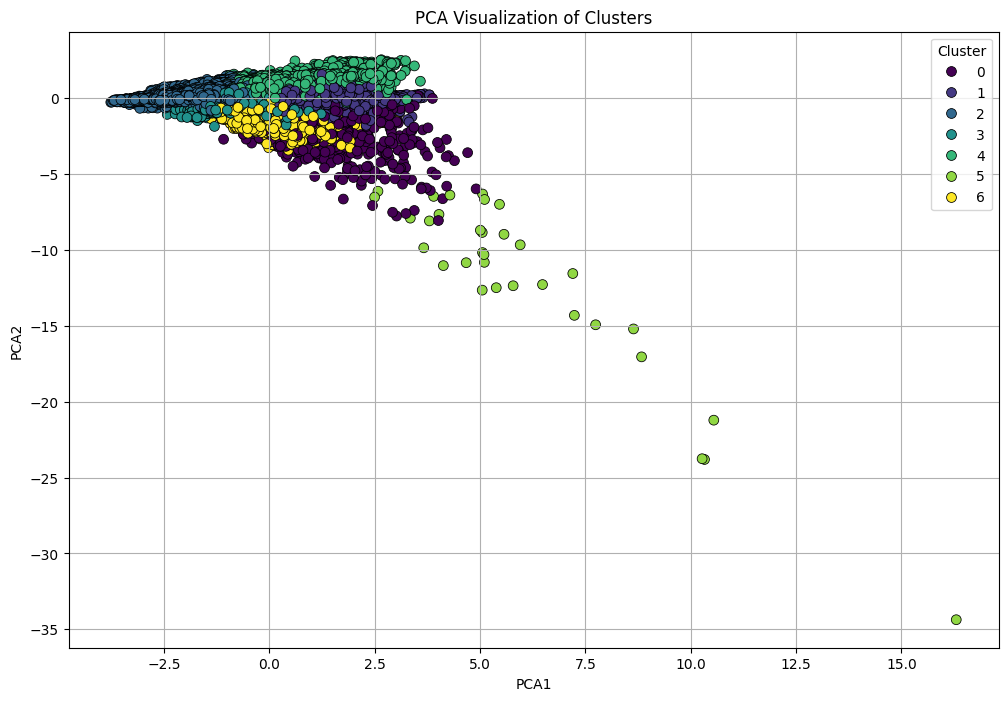


Countries in Cluster 2:
Kabul, Algiers, Manama, Dhaka, Phnom Penh, N'djamena, Beijing, Nicosia, Cairo, Athens, New Delhi, Tehran, Baghdad, Jerusalem, Amman, Kuwait City, Valletta, Ulaanbaatar, Pathein, Kathmandu, Niamey, Pyongyang, Muscat, Islamabad, Doha, Riyadh, Juba, Khartoum, Damascus, Dushanbe, Abu Dhabi, Sanaa, Tirana, Djibouti, Helsinki, Berlin, Bissau, Bamako, Abuja, Warsaw, Tunis, Ankara, Sarajevo, Ouagadougou, Zagreb, Banjul, Vatican City, Rome, Yaren, Oslo, Tashkent, Yerevan, Sofia, Roseau, Tallinn, Skopje, Belgrade, Madrid, Beirut, Stockholm, Budapest, Nouakchott, Bucharest, Moscow, Bangui, Riga, Monaco, Ashgabat, Chi Chi Khvar, Lisbon, Baku, Minsk, Vilnius, Praia, Lom, Vienna, Tbilisi, Podgorica, Bratislava, Asmara, Bogot, Copenhagen, Ljubljana, Seoul, Conakry, Prague, Astana, Andorra La Vella, Bern, Kyiv, Bishkek, San Marino, Hanoi, Vaduz, London, Rabat, Brussels, Paris, New York, Pristina, Luxembourg, Amsterdam, 'S Gravenjansdijk, Kuwait, Moldova, Morocco City, City Of 

<ipython-input-3-be863a092798>:108: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_sampled = df_filtered.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=42))


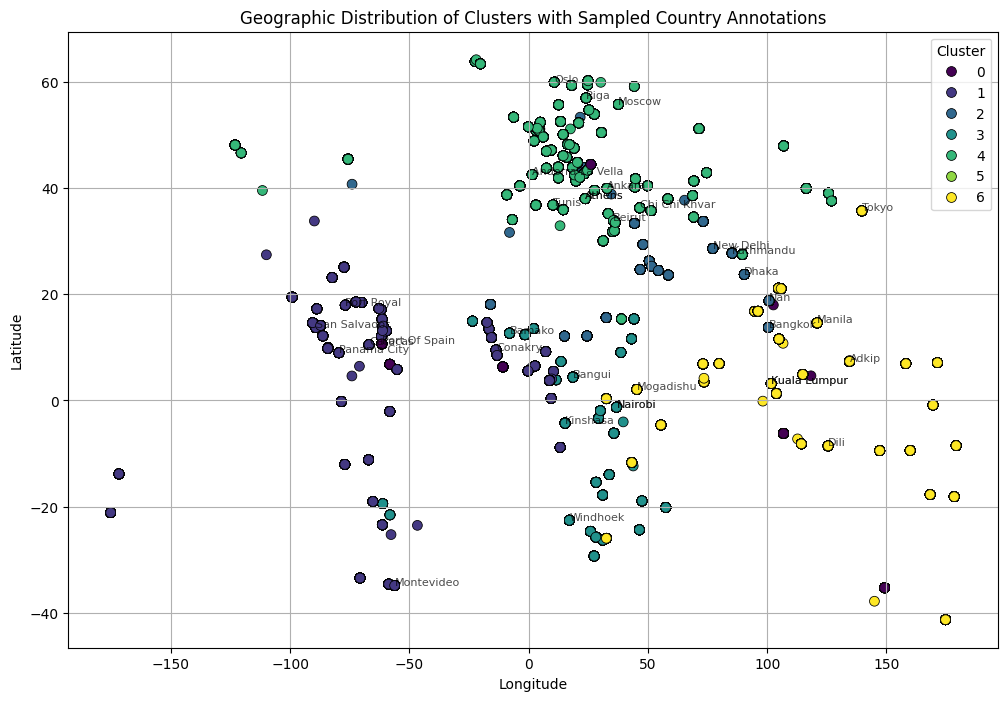

Interactive map saved as 'cluster_map.html'. You can open it in a browser.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

# Key features including the 'location_name' (country data)
key_features = ['location_name', 'latitude', 'longitude', 'temperature_celsius', 'precip_mm', 'humidity',
                'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Carbon_Monoxide']

df_filtered = df[key_features].dropna()

# Grouping by countries
countries = df_filtered['location_name'].unique()
print(f"Number of unique countries: {len(countries)}")

# Normalize climate and location features for clustering
climate_location_features = ['latitude', 'longitude', 'temperature_celsius', 'precip_mm', 'humidity']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_filtered[climate_location_features])

# Optimal number of clusters using silhouette score
best_k = 0
best_score = -1
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal number of clusters: {best_k} (Silhouette Score: {best_score})")

# Fit k-means clustering
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(scaled_features)

# Group air quality profiles by clusters and countries
cluster_profiles = df_filtered.groupby('Cluster')[
    ['air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
     'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']
].mean()

country_profiles = df_filtered.groupby('location_name')[
    ['air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
     'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']
].mean()

print("\nAverage Air Quality Profiles by Cluster:")
print(cluster_profiles)

print("\nAverage Air Quality Profiles by Country:")
print(country_profiles)


# PCA visualization of clusters
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
df_filtered['PCA1'], df_filtered['PCA2'] = reduced_data[:, 0], reduced_data[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=df_filtered, palette='viridis', s=50, edgecolor='k'
)
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Investigating regions in each cluster by country
for cluster in df_filtered['Cluster'].unique():
    print(f"\nCountries in Cluster {cluster}:")
    cluster_countries = df_filtered[df_filtered['Cluster'] == cluster]['location_name'].unique()
    print(", ".join(cluster_countries))

import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Function to describe each cluster
def describe_cluster(df, cluster_id):
    cluster_data = df[df['Cluster'] == cluster_id]
    summary = cluster_data.describe()[['temperature_celsius', 'precip_mm', 'humidity',
                                       'air_quality_Ozone', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Carbon_Monoxide', 'air_quality_Nitrogen_dioxide']]
    return summary

# Summarize each cluster
print("Cluster Descriptions:")
for cluster in df_filtered['Cluster'].unique():
    print(f"\nCluster {cluster} Summary:")
    print(describe_cluster(df_filtered, cluster))

# Reduce country annotations for better clarity
country_sampled = df_filtered.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=42))

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude', y='latitude', hue='Cluster', data=df_filtered, palette='viridis', s=50, edgecolor='k'
)
for i in range(len(country_sampled)):
    plt.text(
        country_sampled.iloc[i]['longitude'], country_sampled.iloc[i]['latitude'],
        country_sampled.iloc[i]['location_name'], fontsize=8, alpha=0.7
    )
plt.title("Geographic Distribution of Clusters with Sampled Country Annotations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Generate an interactive map with Folium
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add clusters to the map
marker_cluster = MarkerCluster().add_to(world_map)

for _, row in df_filtered.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Country: {row['location_name']}<br>Cluster: {row['Cluster']}<br>"
              f"Temperature: {row['temperature_celsius']}°C<br>"
              f"Precipitation: {row['precip_mm']} mm<br>"
              f"Humidity: {row['humidity']}%",
        icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'green')
    ).add_to(marker_cluster)

# Save and display the interactive map
world_map.save("cluster_map.html")
print("Interactive map saved as 'cluster_map.html'. You can open it in a browser.")



This question explores whether regions with similar climate patterns (e.g., temperature, precipitation, humidity) exhibit similar air quality profiles. We use clustering methods to analyze global climatic and air quality datasets, with an emphasis on pollutants such as ozone (O₃), nitrogen dioxide (NO₂), particulate matter (PM2.5, PM10), and sulfur dioxide (SO₂). K-means clustering, combined with principal component analysis (PCA), was applied to uncover patterns in the data. Our results demonstrate that climate plays a pivotal role in shaping air quality, offering valuable insights for policymakers seeking to mitigate environmental and health risks.

---

#### **Methods**
**1. Data Preprocessing**
- **Feature Extraction**:
   To capture both climatic and air quality influences, we selected key variables including latitude, longitude, temperature, precipitation, humidity, and concentrations of major pollutants (O₃, NO₂, PM2.5, PM10, and SO₂). This comprehensive selection ensures that both geographic and meteorological conditions, as well as their interactions with pollutants, are accounted for.

- **Handling Missing Data**:
   Records with missing values were removed to maintain data integrity. Incomplete data could skew clustering outcomes or reduce the reliability of cluster characteristics, so the dataset was restricted to locations with full information.

- **Feature Normalization**:
   Climatic variables were normalized using `StandardScaler` to ensure equal weighting during clustering. For instance, temperature (measured in °C) and precipitation (in mm) differ significantly in scale, and scaling prevents larger-magnitude variables from dominating the clustering algorithm.

---

**2. Clustering Model and Evaluation Metrics**
- **K-means Clustering**:
   K-means clustering was employed to partition regions into groups based on similar climatic conditions and pollutant levels. This algorithm minimizes within-cluster variance, ensuring that regions within the same cluster are as similar as possible.

- **Optimal Cluster Selection**:
   The silhouette score was used to evaluate the quality of clustering. This metric measures how similar a region is to its own cluster compared to other clusters, with higher scores indicating better-defined clusters. Testing \(k\) values from 2 to 10 revealed \(k=7\) as the optimal choice, with a silhouette score of 0.335.

   Source: https://scikit-learn.org/stable/modules/clustering.html

- **Principal Component Analysis (PCA)**:
   To visualize the high-dimensional dataset in two dimensions, PCA was applied, retaining over 90% of the data variance. This allowed us to map clusters and verify their separability.

---

**3. Geographic and Air Quality Profiling**
- **Cluster Analysis**:
   Each cluster was examined to summarize climatic characteristics (e.g., temperature, precipitation, and humidity) and average pollutant levels. This enabled us to understand the relationship between climate and pollution.

- **Geographic Mapping**:
   Regions in each cluster were plotted on world maps, providing a visual representation of spatial patterns. This step revealed whether specific climate-driven clusters correspond to geographic or regional trends.

---

#### **Results**

**1. Clustering Outcomes**
The seven clusters revealed distinct climatic and air quality profiles:

- **Cluster 2 (Arid regions)**:
  - **Climate**: High average temperatures (32°C) and low humidity (34%), indicative of desert-like conditions.
  - **Air Quality**: Severe ozone pollution (101.4 µg/m³), consistent with high photochemical activity in sunny, hot conditions.
  - **Examples**: Major cities in the Middle East and South Asia, such as Cairo, New Delhi, and Tehran.

- **Cluster 4 (Temperate regions)**:
  - **Climate**: Moderate temperatures (16.8°C) and high humidity (67%), typical of temperate climates.
  - **Air Quality**: Moderate levels of all pollutants, suggesting better air dispersion and lower emissions compared to arid clusters.
  - **Examples**: European cities like Paris, Vienna, and Brussels.

- **Cluster 6 (Tropical regions)**:
  - **Climate**: High humidity (80%) with moderately high temperatures.
  - **Air Quality**: Moderate PM2.5 (23.4 µg/m³) and PM10 (34.3 µg/m³) concentrations, likely due to biomass burning and industrial activity.
  - **Examples**: Cities in Southeast Asia, such as Jakarta and Manila.

---

**2. Geographic Trends**
Clusters aligned geographically:
- Arid clusters (Cluster 2) were concentrated in the Middle East and North Africa, where high temperatures and low rainfall exacerbate ozone levels.
- Temperate clusters (Cluster 4) were largely located in Europe and North America, benefiting from moderate climates and stricter pollution controls.
- Tropical clusters (Cluster 6) corresponded to Southeast Asia, where high humidity facilitates pollutant formation but also enhances dispersion.

---

**3. Principal Component Analysis (PCA)**
PCA reduced the dataset to two principal components, which accounted for over 90% of the variance. Visualizations showed distinct cluster separations, confirming that climatic and pollutant profiles varied significantly across regions.

---

#### **Discussion**

**1. Insights into Weather and Air Quality**
- **Ozone (O₃)**:
   Arid regions exhibited the highest ozone levels due to high solar radiation, which drives photochemical reactions. Urban emissions, such as vehicle exhaust, also contribute to ozone formation.
- **Nitrogen Dioxide (NO₂)**:
   High NO₂ concentrations were observed in industrialized areas, reflecting emissions from vehicles, power plants, and factories. These emissions often correlate with urban density and traffic intensity.
- **Particulate Matter (PM2.5 and PM10)**:
   Tropical regions showed elevated particulate levels due to biomass burning, industrial activities, and urbanization. However, high rainfall in these regions likely mitigates pollutant concentrations through wet deposition.

---

**2. Model Effectiveness**
- **Clustering Success**:
   - The clustering results aligned well with known climatic zones and pollution patterns, validating the model’s ability to group regions based on both environmental and pollutant characteristics.
- **Limitations**:
   - Imbalanced clusters (e.g., fewer countries in Cluster 5) may reduce generalizability. Additionally, the lack of temporal data limited our ability to explore seasonal variations.

---

## **Conclusion**

This analysis demonstrates a clear link between climatic conditions and air quality profiles. Regions with similar climate patterns tend to exhibit comparable pollutant concentrations, driven by factors like temperature, humidity, and precipitation. These findings highlight the need for climate-specific air quality management strategies. Future research could incorporate temporal data and socioeconomic variables to provide a more comprehensive understanding of the climate-pollution relationship.
